In [201]:
import pandas as pd
import numpy as np
import os
import string

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
emissions = pd.read_excel('../../data/tidy/Emissions-Reduction-Calculation.xlsx')
activity = pd.read_csv('../../results/sectors/NewHaven-Emissions-Summary.csv')
activity

,Year,Sector,Subsector,Activity Data Description,Activity Data Unit,Activity Data,GHG Emissions (MMTCO2e),Population,Emissions per Capita (MTCO2e)
0,2021,Mobile Combustion,Automobile,Vehicle Miles Traveled,Billion Miles,2.806589,1.028899,864751,1.189821
1,2021,Mobile Combustion,Motorcycle,Vehicle Miles Traveled,Billion Miles,0.208674,0.036643,864751,0.042374
2,2021,Mobile Combustion,Trucks,Vehicle Miles Traveled,Billion Miles,3.870990,1.789613,864751,2.069512
3,2021,Mobile Combustion,Buses,Vehicle Miles Traveled,Billion Miles,0.025632,0.020234,864751,0.023399
4,2021,Electricity Consumption,Residential,Electricity Consumption,TWh,2.481066,0.612048,864751,0.707773
5,2021,Electricity Consumption,Commercial/Industrial,Electricity Consumption,TWh,2.849325,0.702893,864751,0.812827
6,2021,Solid Waste,Waste Combustion,Waste Combustion Emissions,,NaN,0.000000,864751,0.000000
7,2021,Solid Waste,Landfill Emissions,Landfills Emissions,,NaN,0.000000,864751,0.000000
8,2020,Stationary Combustion,Residential,Household Heating Oil Consumption,Million Gallon,74.623292,0.759970,855733,0.888093
9,2020,Stationary Combustion,Residential,Household Propane Consumption,Million Gallon,9.975587,0.057276,855733,0.066932


In [203]:
# Remove rows starting from index 20
emissions = emissions.iloc[:20]

# Keep only the first four columns
emissions = emissions.iloc[:17, :4]
emissions

,Sector,Subsector,Year,Total Emissions (MMTCO2e)
0,Mobile Combustion,Automobile,2021.0,1.028899
1,Mobile Combustion,Motorcycle,2021.0,0.036643
2,Mobile Combustion,Trucks,2021.0,1.789613
3,Mobile Combustion,Buses,2021.0,0.020234
4,Electricity Consumption,Residential Electricity,2021.0,0.612048
5,Electricity Consumption,Commercial&Industrial Electricity,2021.0,0.702893
6,Solid Waste Landfills,Landfill fuel combustion,2021.0,0.000000
7,Solid Waste Landfills,Landfill methane,2021.0,0.000000
8,Stationary Combustion,Residential fuel oil,2020.0,0.760000
9,Stationary Combustion,Residential natural gas,2020.0,0.540000


In [204]:
sum_emissions = emissions["Total Emissions (MMTCO2e)"].sum()

In [205]:
sum_emissions

6.9718299340000005

In [206]:
# EFmobile = [8.78, 10.21,0.008,0.007, 0,0,0.005,0.005,0.001,0.001] 
# EFe = [543.852]
# EFr = [10422.49,5741.65,54.44]
# R = [24.1, 22.1, 12.96, 50]

# EFcar = (8.78/24.1/1000+0.008*25/1000000+0.007*298/1000000)*1000000000
# EFmotor = 8.78/50/1000*1000000000
# EFtruck = (10.21/22.1/1000+0.001*25/1000000+0.001*298/1000000)*1000000000
# EFbus = (10.21/12.96/1000 + 0.005*25/1000000+0.005*298/1000000)*1000000000
# EFe = 543.852/2204.62
# Qrs = 1
# EFroil = 
# EFrgas = 
# EFrpropane = 


# EFGG = [EFcar,EFmotor,EFtruck,EFbus,EFe,Qrs,EFr,Qrc,Qri,Qra,Qrw]
#R represents a constant and it means mpg here: passenger_car gasoline, light truck diesel, heavy duty diesel, motorcycle gasoline
#gasoline, diesel, CH4 and N20 for gaso_passenger, gaso_motorcycle, bus, truck individually
Et = emissions['Total Emissions (MMTCO2e)'].tolist()
Qa = activity['Activity Data'].tolist()

In [207]:
Et

[1.028899302,
 0.036643172,
 1.789612608,
 0.020234238,
 0.612047787,
 0.702892598,
 0.0,
 0.0,
 0.76,
 0.54,
 0.06,
 0.96,
 0.339402,
 9.88e-05,
 0.029055486,
 8.68e-05,
 0.092857143]

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc

# Example dataframe representing baseline values and upper/lower bounds
# data = {
#     'Label': ['u_1', 'u_2', 'u_3', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9', 'u_10', 'u_11', 'u_12', 'u_13', 'u_14', 'u_15', 'u_16', 'u_17', 'u_18', 'u_19', 'u_20'],
#     'Parameter': ['Passenger car VMT', 'Motorcycle VMT', 'Trucks VMT', 'Bus VMT', 'Passenger car MPG', 'Motorcycle MPG', 'Trucks MPG', 'Bus MPG', 
#                   'Regional e-Grid emissions factors', 'Residential electricity consumption', 'Commercial and industrial electricity consumption', 
#                   'Residential fuel oil consumption', 'Residential propane consumption', 'Residential natural gas consumption', 'Commercial building footprint ratio', 
#                   'Industrial emissions', 'Organic fertilizer land area', 'Synthetic fertilizer land area', 'Manure fertilizer land area', 'Regional to state wastewater facility ratio'],
#     'Baseline Activity Value': [2.81, 0.21, 3.87, 0.03, 24.1, 50, 22.1, 12.96, 543.85, 2.48, 2.85, 74.62, 9.98, 9988.5, 0.25, 0.34, 173, 3764, 1125, 0.24],
#     'Lower Bound': [2.70, 0.1, 3.5, 0.02, 22, 48, 21, 12, 510, 2.3, 2.7, 72, 9, 9900, 0.2, 0.3, 170, 3700, 1100, 0.2],
#     'Upper Bound': [2.95, 0.3, 4.2, 0.05, 26, 52, 23, 13.5, 580, 2.7, 3.0, 77, 10, 10000, 0.3, 0.4, 180, 3800, 1150, 0.3]
# }

data = {
    'Label': ['u_1', 'u_2', 'u_3', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9'],
    'Parameter': ['Car VMT', 'Truck VMT', 'Car MPG', 'E-grid EF', 'Res Elec Con', 'Com/Ind Elec Con', 'Res Fuel Oil', 'Res Propane', 'Res NG'],
    'Baseline Activity Value': [2.81, 3.87, 24.1, 543.85, 2.48, 2.85, 74.62, 9.98, 9988.5],
    'Lower Bound': [2.81 * (1 - 1), 3.87 * (1 - 1), 24.1 * (1 - 0.5), 543.85 * (1 - 1.00), 2.48 * (1 - 0.80), 
                    2.85 * (1 - 0.80), 74.62 * (1 - 1), 9.98 * (1 - 1), 9988.5 * (1 - 1)],
    'Upper Bound': [2.81 * (1 + 1.00), 3.87 * (1 + 1.00), 24.1 * (1 + 1.00), 543.85 * (1 + 1), 2.48 * (1 + 1), 
                    2.85 * (1 + 1), 74.62 * (1 + 1), 9.98 * (1 + 1), 9988.5 * (1 + 1)]
}



# Create the dataframe
activity_df = pd.DataFrame(data)

# Number of samples you want to generate
num_samples = 1000  # You can adjust this

# Initialize the Latin Hypercube Sampling generator (20 dimensions, one for each parameter)
sampler = qmc.LatinHypercube(d=20, seed=42)  # 20 dimensions (parameters)
lhs_samples = sampler.random(n=num_samples)  # Generate random samples

# Rescale the samples to match the bounds in the activity_df
scaled_samples = np.zeros_like(lhs_samples)
for i, param in enumerate(activity_df['Parameter']):
    low = activity_df.loc[i, 'Lower Bound']
    high = activity_df.loc[i, 'Upper Bound']
    
    # Check if bounds are valid and consistent (no NaN and l_bounds < u_bounds)
    if np.isnan(low) or np.isnan(high) or low >= high:
        print(f"Invalid bounds for parameter '{param}': Lower Bound = {low}, Upper Bound = {high}")
        continue  # Skip this parameter if bounds are invalid
    
    # Reshape lhs_samples[:, i] to a 2D array and then scale it to the parameter bounds
    scaled_samples[:, i] = qmc.scale(lhs_samples[:, i].reshape(-1, 1), l_bounds=[low], u_bounds=[high]).flatten()

# Calculate continuous uncertainty over the samples
uncertainty_ranges_continuous = []
for i, param in enumerate(activity_df['Parameter']):
    baseline = activity_df.loc[i, 'Baseline Activity Value']
    
    # Calculate the uncertainty across all the scaled samples for this parameter
    uncertainty_range = scaled_samples[:, i] 
    
    # Store the uncertainty for visualization or analysis
    uncertainty_ranges_continuous.append({
        'Parameter': param,
        'Uncertainty Distribution': uncertainty_range
    })

# Convert the uncertainty range list to a DataFrame for better presentation
uncertainty_df_continuous = pd.DataFrame(uncertainty_ranges_continuous)


# Optional: Plotting the distribution of the uncertainty for the first parameter
# plt.hist(uncertainty_ranges_continuous[0]['Uncertainty Distribution'], bins=30, alpha=0.7, label=activity_df['Parameter'][0])
# plt.xlabel("Uncertainty Value")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()
uncertainty_df_continuous
uncertainty_df_continuous.to_excel("uncertainty_summary_statistics.xlsx", index=False)
uncertainty_df_continuous

,Parameter,Uncertainty Distribution
0,Car VMT,"[5.531350367007115, 4.35685954690072, 2.464723..."
1,Truck VMT,"[1.0105430808763192, 0.12109596900667481, 2.50..."
2,Car MPG,"[34.14276168519521, 29.43920926641813, 17.4833..."
3,E-grid EF,"[726.9127727947922, 384.0743521563378, 150.850..."
4,Res Elec Con,"[1.0580435923190294, 2.4075812960690626, 4.911..."
5,Com/Ind Elec Con,"[1.4011850573361033, 3.91376150342872, 3.39250..."
6,Res Fuel Oil,"[7.6468875108749605, 41.71754655740378, 37.699..."
7,Res Propane,"[16.531150156466673, 4.869365676834887, 12.189..."
8,Res NG,"[15040.121673960042, 7807.9247588169665, 405.8..."


In [209]:
#emissions modeling for emissions reduction prediction

#function to calculate the emissions reduction

#mobile combustion
def model_emissions_Em(Ei,VMT,mpg,EFmco2,EFmch4,EFmn2o):
    Em = Ei - (VMT*1000000*EFmco2/mpg+VMT*EFmch4*1000*25+VMT*EFmn2o*1000*25)/1000000
    return Em

#electricity consumption, residential consumption
def model_emissions_Eer(Ei,Qe,EFe):
    Ee = Ei - Qe*EFe/2204.62
    return Ee

# residential consumption
def model_emissions_Er(Ei,Qe,EFe):
    Ee = Ei - Qe*EFe/1000000
    return Ee
    
#commercial consumption
def model_emissions_Ec(Ei,Es,R):
    Ee = Ei - Es*R
    return Ee

#industrial consumption
def model_emissions_Ei(Ei,E):
    Ee = Ei - E
    return Ee

#agriculture
def model_emissions_Ea(Ei,R,C):
    Ee = Ei - R*C
    return Ee

#wastewater treatment
def model_emissions_Ew(Ei,Es,R):
    Ee = Ei - Es*R
    return Ee

In [210]:
EFmco2_gasoline = 8.78 
EFmco2_diesel = 10.21
EFmch4_car = 0.008
EFmn2o_car =0.007
EFmch4_motorcycle = 0
EFmn2o_motorcycle = 0 
EFmch4_buses = 0.005
EFmn2o_buses = 0.005
EFmch4_trucks = 0.001
EFmn2o_trucks = 0.001 
EFer_oil = 10150+ 0.41*25+0.08*298
EFer_propane = 5720+0.27*25+0.05*298
EFer_naturalgas = 54.44


In [211]:
uncertainty_df_continuous

,Parameter,Uncertainty Distribution
0,Car VMT,"[5.531350367007115, 4.35685954690072, 2.464723..."
1,Truck VMT,"[1.0105430808763192, 0.12109596900667481, 2.50..."
2,Car MPG,"[34.14276168519521, 29.43920926641813, 17.4833..."
3,E-grid EF,"[726.9127727947922, 384.0743521563378, 150.850..."
4,Res Elec Con,"[1.0580435923190294, 2.4075812960690626, 4.911..."
5,Com/Ind Elec Con,"[1.4011850573361033, 3.91376150342872, 3.39250..."
6,Res Fuel Oil,"[7.6468875108749605, 41.71754655740378, 37.699..."
7,Res Propane,"[16.531150156466673, 4.869365676834887, 12.189..."
8,Res NG,"[15040.121673960042, 7807.9247588169665, 405.8..."


In [212]:
VMT_car = uncertainty_df_continuous['Uncertainty Distribution'][0]
VMT_trucks  = uncertainty_df_continuous['Uncertainty Distribution'][1]

mpg_car = uncertainty_df_continuous['Uncertainty Distribution'][2]

EFee = uncertainty_df_continuous['Uncertainty Distribution'][3]
Qre = uncertainty_df_continuous['Uncertainty Distribution'][4]
Qce = uncertainty_df_continuous['Uncertainty Distribution'][5]

Qrfuel = uncertainty_df_continuous['Uncertainty Distribution'][6]
Qrpropane = uncertainty_df_continuous['Uncertainty Distribution'][7]
Qrgas = uncertainty_df_continuous['Uncertainty Distribution'][8]

In [213]:
Eim_car = emissions['Total Emissions (MMTCO2e)'][0]
Eim_motorcycle = emissions['Total Emissions (MMTCO2e)'][1]
Eim_trucks = emissions['Total Emissions (MMTCO2e)'][2]
Eim_buses = emissions['Total Emissions (MMTCO2e)'][3]
Ei_r_e = emissions['Total Emissions (MMTCO2e)'][4]
Ei_c_e = emissions['Total Emissions (MMTCO2e)'][5]

Ei_r_oil = emissions['Total Emissions (MMTCO2e)'][8]
Eim_r_gas = emissions['Total Emissions (MMTCO2e)'][9]
Eim_r_propane = emissions['Total Emissions (MMTCO2e)'][10]
Eim_commr = emissions['Total Emissions (MMTCO2e)'][11]
Eim_indus = emissions['Total Emissions (MMTCO2e)'][12]
Eim_organic = emissions['Total Emissions (MMTCO2e)'][13]
Eim_synthetic = emissions['Total Emissions (MMTCO2e)'][14]
Eim_manure = emissions['Total Emissions (MMTCO2e)'][15]
Eim_waste = emissions['Total Emissions (MMTCO2e)'][16]

#mobile emissions
Emissions_mobile_car_vmt = model_emissions_Em(Eim_car,VMT_car, 24.1, EFmco2_gasoline, EFmch4_car,EFmn2o_car)
Emissions_mobile_trucks_vmt = model_emissions_Em(Eim_trucks,VMT_trucks, 22.1, EFmco2_diesel,EFmch4_trucks,EFmn2o_trucks)

Emissions_mobile_car_mpg = model_emissions_Em(Eim_car,2.806589, mpg_car, EFmco2_gasoline, EFmch4_car,EFmn2o_car)


#electricity consumption emissions
Emissions_electricity_residential_EF= model_emissions_Eer(Ei_r_e,2.48,EFee)
Emissions_electricity_commercial_industrial_EF = model_emissions_Eer(Ei_c_e,2.85,EFee)

Emissions_electricity_residential_Q= model_emissions_Eer(Ei_r_e,Qre,543.852)
Emissions_electricity_commercial_industrial_Q = model_emissions_Eer(Ei_c_e,Qce,543.852)

#stationary combustion emissions
Emissions_residential_oil= model_emissions_Er(Ei_r_oil,Qrfuel,EFer_oil)
Emissions_residential_propane = model_emissions_Er(Eim_r_gas,Qrpropane,EFer_propane)
Emissions_residential_gas= model_emissions_Er(Eim_r_propane,Qrgas,EFer_naturalgas)

In [214]:
def total_emissions(uncertainty, sector):
    E = sum_emissions + uncertainty-sector
    return E

In [215]:
E_mobile_car_vmt = total_emissions(Emissions_mobile_car_vmt, Eim_car)
E_mobile_trucks_vmt = total_emissions(Emissions_mobile_trucks_vmt, Eim_trucks)
E_mobile_car_mpg = total_emissions(Emissions_mobile_car_mpg, Eim_car)

E_mobile_electricity_residential_EF = total_emissions(Emissions_electricity_residential_EF, Ei_r_e)
E_mobile_electricity_commercial_industrial_EF = total_emissions(Emissions_electricity_commercial_industrial_EF, Ei_c_e)
E_mobile_electricity_residential_Q = total_emissions(Emissions_electricity_residential_Q, Ei_r_e)
E_mobile_electricity_commercial_industrial_Q = total_emissions(Emissions_electricity_commercial_industrial_Q, Ei_c_e)

E_mobile_residential_oil = total_emissions(Emissions_residential_oil, Ei_r_oil)
E_mobile_residential_propane = total_emissions(Emissions_residential_propane, Eim_r_propane)
E_mobile_residential_gas = total_emissions(Emissions_residential_gas, Eim_r_gas)


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_32648\1153347559.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)


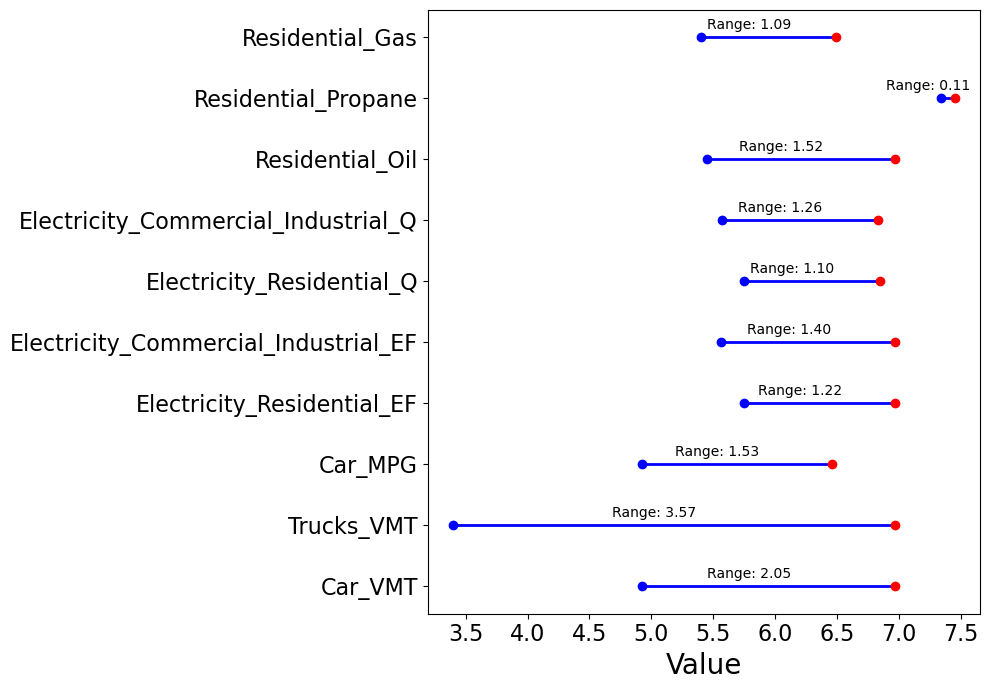

In [216]:
# Extract arrays and labels
arrays = [arr for arr, label in data_arrays]
labels = [label for arr, label in data_arrays]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Loop through each array to calculate and plot smallest, largest, and range
for i, arr in enumerate(arrays):
    smallest_value = np.min(arr)
    largest_value = np.max(arr)
    range_value = largest_value - smallest_value
    
    # Plot the lollipop for the current array (now horizontal)
    ax.hlines(i, smallest_value, largest_value, color='b', lw=2)
    ax.plot(smallest_value, i, 'bo', label=f"Min: {smallest_value:.2f}" if i == 0 else "")
    ax.plot(largest_value, i, 'ro', label=f"Max: {largest_value:.2f}" if i == 0 else "")
    
    # Annotate the range
    ax.text((smallest_value + largest_value) / 2-0.5, i+0.2, f'Range: {range_value:.2f}', verticalalignment='center')

# Set labels and title
ax.set_yticks(range(len(arrays)))
ax.set_yticklabels(labels)
ax.set_ylabel('')
ax.set_xlabel('Value', fontsize=20)
#ax.set_title('Lollipop Plot: Smallest, Largest, and Range for Each Array')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Add legend
#ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [217]:
df = pd.DataFrame({name: values for values, name in data_arrays})
df

,Car_VMT,Trucks_VMT,Car_MPG,Electricity_Residential_EF,Electricity_Commercial_Industrial_EF,Electricity_Residential_Q,Electricity_Commercial_Industrial_Q,Residential_Oil,Residential_Propane,Residential_Gas
0,4.954600,6.504918,6.249048,6.154118,6.032121,6.710824,6.626175,6.893953,7.356914,5.673046
1,5.382925,6.915879,6.133736,6.539781,6.475322,6.377910,6.006354,6.546975,7.423872,6.066767
2,6.072969,5.812544,5.561330,6.802137,6.776819,5.760189,6.134943,6.587891,7.381840,6.469734
3,5.378642,6.594438,6.343546,5.931512,5.776303,5.899825,6.215617,6.800934,7.394563,5.749068
4,6.944498,4.283983,5.856086,6.318650,6.221200,6.547766,6.762995,6.374098,7.436068,6.357149
...,...,...,...,...,...,...,...,...,...,...
995,6.747034,5.721574,6.082491,6.735937,6.700744,6.043982,6.545203,6.901336,7.370371,6.130721
996,6.881800,6.256135,6.341074,5.793041,5.617173,6.314323,6.001832,6.234110,7.367317,5.771473
997,6.436888,6.806204,6.317985,6.295611,6.194723,6.000492,6.020855,5.516814,7.398775,5.441624
998,6.704760,5.420396,6.109404,6.547199,6.483847,5.991876,5.963900,6.793500,7.450341,5.636679


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

Optimal clusters based on AIC: 9
Optimal clusters based on BIC: 1


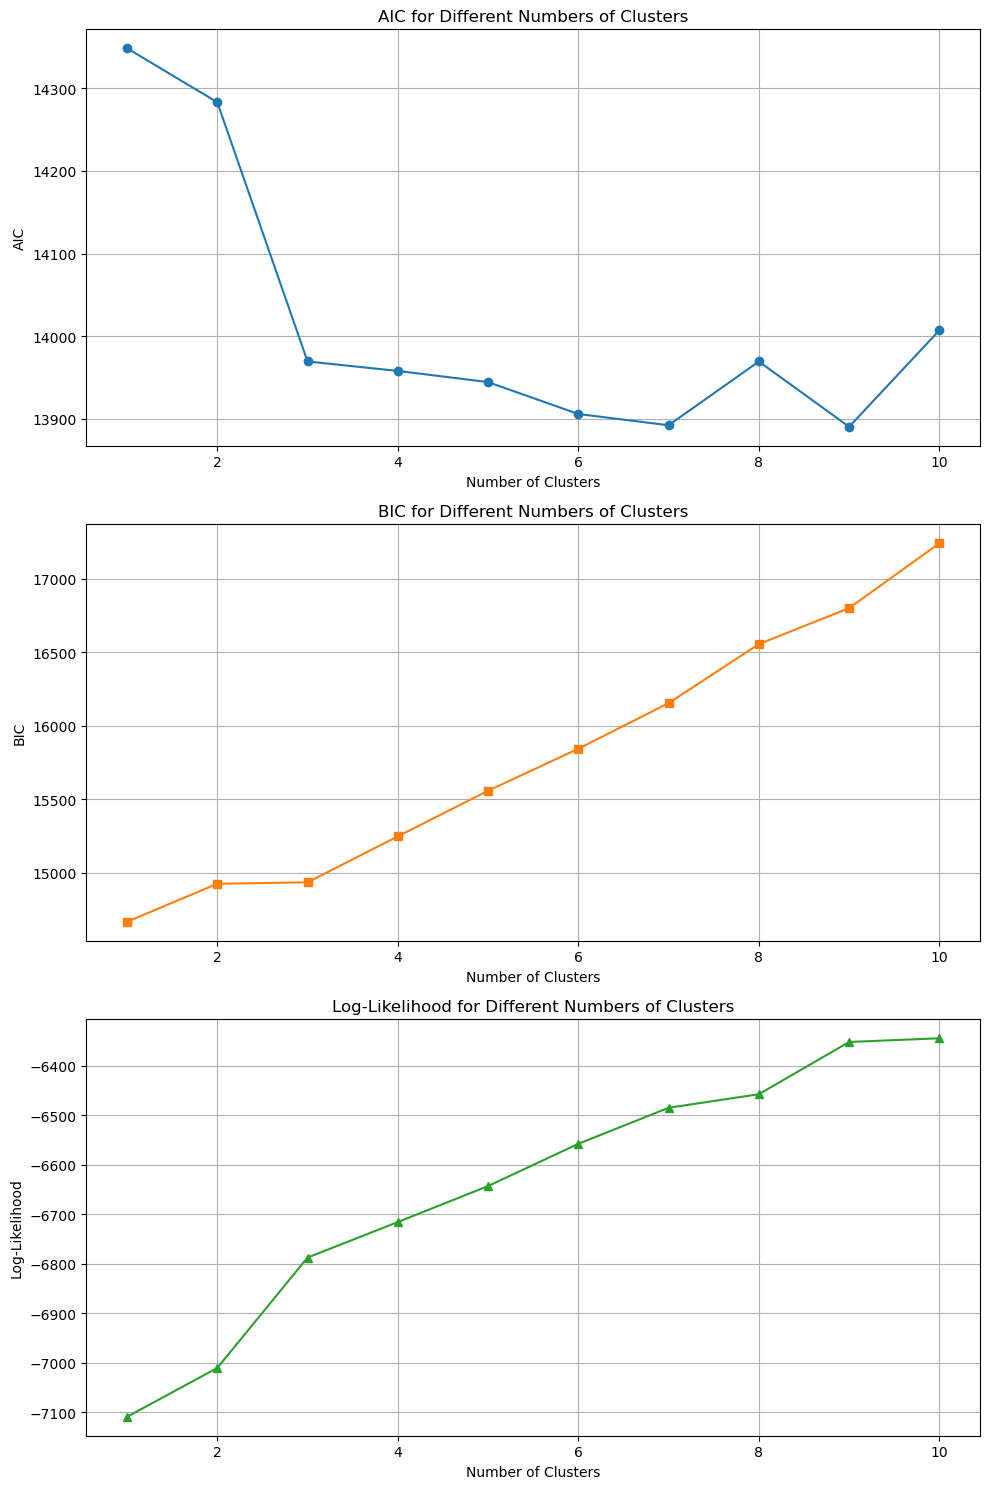

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# A function to compute AIC/BIC/log-likelihood for different numbers of clusters
def select_optimal_clusters(data, max_clusters=10):
    aic_values = []
    bic_values = []
    log_likelihood_values = []
    
    for n_clusters in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=60)
        gmm.fit(data)
        
        aic_values.append(gmm.aic(data))
        bic_values.append(gmm.bic(data))
        log_likelihood_values.append(gmm.score(data) * len(data))  # Log likelihood is the sum of log densities
    
    # Choose the optimal number of clusters based on the minimum AIC or BIC
    optimal_clusters_aic = np.argmin(aic_values) + 1
    optimal_clusters_bic = np.argmin(bic_values) + 1
    return optimal_clusters_aic, optimal_clusters_bic, aic_values, bic_values, log_likelihood_values

# Determine the optimal number of clusters based on AIC, BIC, and Log-Likelihood
optimal_clusters_aic, optimal_clusters_bic, aic_values, bic_values, log_likelihood_values = select_optimal_clusters(scaled_data)

print(f"Optimal clusters based on AIC: {optimal_clusters_aic}")
print(f"Optimal clusters based on BIC: {optimal_clusters_bic}")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot AIC
axes[0].plot(range(1, len(aic_values) + 1), aic_values, label='AIC', marker='o', color='tab:blue')
axes[0].set_title('AIC for Different Numbers of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('AIC')
axes[0].grid(True)

# Plot BIC
axes[1].plot(range(1, len(bic_values) + 1), bic_values, label='BIC', marker='s', color='tab:orange')
axes[1].set_title('BIC for Different Numbers of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('BIC')
axes[1].grid(True)

# Plot Log-Likelihood
axes[2].plot(range(1, len(log_likelihood_values) + 1), log_likelihood_values, label='Log-Likelihood', marker='^', color='tab:green')
axes[2].set_title('Log-Likelihood for Different Numbers of Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Log-Likelihood')
axes[2].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [219]:
# Fit the GMM with the optimal number of clusters (choose AIC or BIC based result)
gmm = GaussianMixture(n_components=optimal_clusters_aic, random_state=42)
gmm.fit(scaled_data)


#select the covariance here. always use "Full" (usin four covariance) global optimun
#grid search; covariance: cluster less than 5

#how each emisisons in each cluster: if each cluster has very distinguishable emissions

# Get the cluster labels from the GMM
df['Cluster_Label'] = gmm.predict(scaled_data)
optimal_clusters_aic

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


9

In [220]:
#using other clustering


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_32648\2134626129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


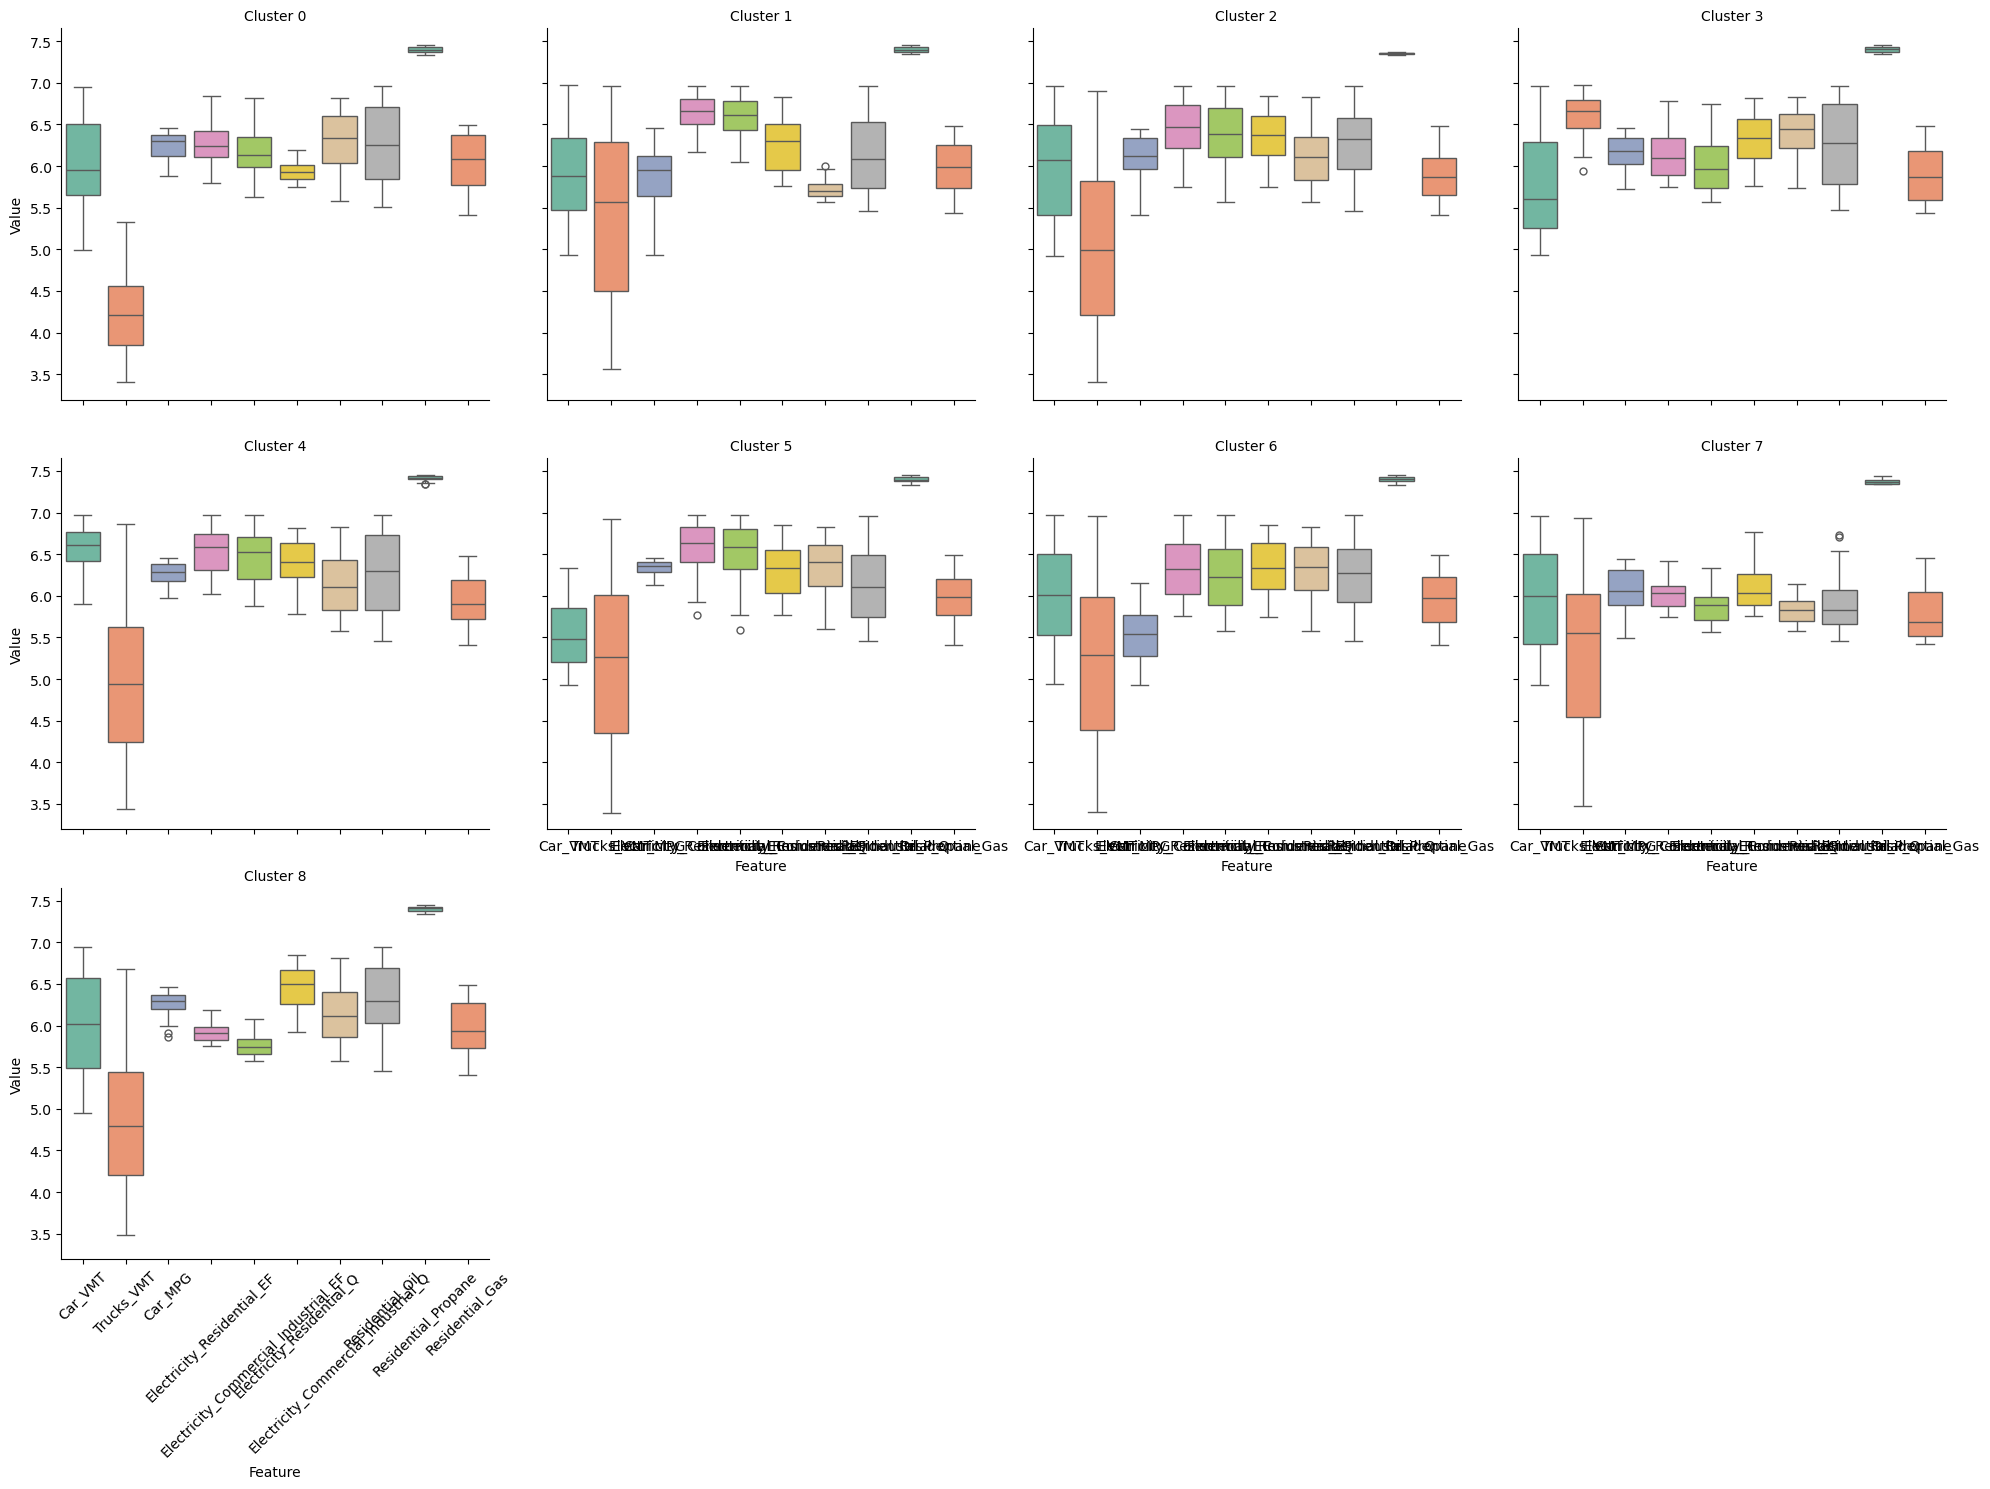

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Melt the DataFrame to long format for FacetGrid
df_melted = df.melt(id_vars=["Cluster_Label"], var_name="Feature", value_name="Value")

# Step 2: Create a FacetGrid with boxplots, flipping Cluster and Feature
g = sns.catplot(
    data=df_melted, 
    x="Feature", 
    y="Value", 
    col="Cluster_Label",   # Each cluster gets its own subplot
    kind="box", 
    col_wrap=4,  # Adjust based on the number of clusters
    sharey=True,  # Ensure the same y-axis range across plots
    palette="Set2"
)

# Step 3: Adjust aesthetics
g.set_axis_labels("Feature", "Value")
g.set_titles(col_template="Cluster {col_name}")  # Show cluster numbers as titles
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()


In [222]:
df

,Car_VMT,Trucks_VMT,Car_MPG,Electricity_Residential_EF,Electricity_Commercial_Industrial_EF,Electricity_Residential_Q,Electricity_Commercial_Industrial_Q,Residential_Oil,Residential_Propane,Residential_Gas,Cluster_Label
0,4.954600,6.504918,6.249048,6.154118,6.032121,6.710824,6.626175,6.893953,7.356914,5.673046,3
1,5.382925,6.915879,6.133736,6.539781,6.475322,6.377910,6.006354,6.546975,7.423872,6.066767,3
2,6.072969,5.812544,5.561330,6.802137,6.776819,5.760189,6.134943,6.587891,7.381840,6.469734,6
3,5.378642,6.594438,6.343546,5.931512,5.776303,5.899825,6.215617,6.800934,7.394563,5.749068,3
4,6.944498,4.283983,5.856086,6.318650,6.221200,6.547766,6.762995,6.374098,7.436068,6.357149,6
...,...,...,...,...,...,...,...,...,...,...,...
995,6.747034,5.721574,6.082491,6.735937,6.700744,6.043982,6.545203,6.901336,7.370371,6.130721,4
996,6.881800,6.256135,6.341074,5.793041,5.617173,6.314323,6.001832,6.234110,7.367317,5.771473,8
997,6.436888,6.806204,6.317985,6.295611,6.194723,6.000492,6.020855,5.516814,7.398775,5.441624,7
998,6.704760,5.420396,6.109404,6.547199,6.483847,5.991876,5.963900,6.793500,7.450341,5.636679,4


In [223]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pyprind import PRIM
import matplotlib.pyplot as plt

# Assuming `df` is your dataframe and `scaled_data` contains the features
X = scaled_data
y = df['Predicted_Cluster_Label']

# Initialize and fit the PRIM model
prim = PRIM(min_samples=50, min_purity=0.8)  # Adjust parameters as needed
prim.fit(X, y)

# Get the rules found by PRIM
rules = prim.rules_

# Print the rules
for i, rule in enumerate(rules):
    print(f"Rule {i+1}: {rule}")

# You can visualize the boxes created by PRIM in a 2D or 3D plot if desired
# For simplicity, let's use the first two features (components) for visualization
plt.figure(figsize=(8, 6))
for rule in rules:
    if rule.target == 1:  # You can adjust to show clusters of interest
        # You can plot the regions in the feature space that belong to this rule
        # Extract lower and upper bounds of the box
        lower_bounds = rule.lower_bounds_
        upper_bounds = rule.upper_bounds_
        
        # Plot a shaded area to indicate the region
        plt.fill_betweenx(
            X[:, 0], lower_bounds[0], upper_bounds[0], alpha=0.3, color='orange')
        plt.fill_betweenx(
            X[:, 1], lower_bounds[1], upper_bounds[1], alpha=0.3, color='orange')
    
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('PRIM with Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Cluster Label')
plt.show()


ImportError: cannot import name 'PRIM' from 'pyprind' (C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pyprind\__init__.py)